In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
import sklearn.ensemble as se
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

import seaborn as sns
%matplotlib inline
from xgboost import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
file2 = 'afterfilter.xlsx'
data = pd.read_excel(file2)

In [3]:
df = data

In [4]:
df.columns

Index(['Gender', 'Age', 'Annual-Family-Income', 'Ratio-Family-Income-Poverty',
       'Systolic', 'Diastolic', 'Weight', 'Height', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.', 'Mean-cell-Hemoglobin',
       'Platelet-count', 'Mean-Platelet-Vol', 'Segmented-Neutrophils',
       'Hematocrit', 'Red-Cell-Distribution-Width', 'Albumin', 'Cholesterol',
       'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'Total-Cholesterol', 'HDL', 'Glycohemoglobin', 'Vigorous-work',
       'Moderate-work', 'Health-Insurance', 'Blood-Rel-Diabetes', 'Diabetes'],
      dtype='object')

In [5]:
y =  df['Diabetes']
x = df.drop(['Diabetes'],axis = 1)

In [6]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

x_balance, y_balance = adasyn.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_balance,y_balance,test_size=0.2, random_state=42)

In [7]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
xg_proba=xg_model.predict_proba(X_test)
####评价指标
print(classification_report(y_test, xg_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9784    0.9856    0.9820      5555
           1     0.9858    0.9786    0.9822      5657

    accuracy                         0.9821     11212
   macro avg     0.9821    0.9821    0.9821     11212
weighted avg     0.9821    0.9821    0.9821     11212



In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(xg_pred,y_test)

array([[5475,  121],
       [  80, 5536]], dtype=int64)

In [9]:
spc = 5536/(5536+121)
spc

0.9786105709740145

In [10]:
rf_model = se.RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba=rf_model.predict_proba(X_test)
rf_accuracy_score=accuracy_score(y_test,rf_pred)
rf_preci_score=precision_score(y_test,rf_pred)
rf_recall_score=recall_score(y_test,rf_pred)
rf_f1_score=f1_score(y_test,rf_pred)
rf_auc=roc_auc_score(y_test,rf_proba[:,1])
print(classification_report(y_test, rf_pred))
print('rf_accuracy_score: %f,rf_preci_score: %f,rf_recall_score: %f,rf_f1_score: %f,rf_auc:%f'
      %(rf_accuracy_score,rf_preci_score,rf_recall_score,rf_f1_score,rf_auc))
gbm_model = LGBMClassifier()
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
gbm_proba=gbm_model.predict_proba(X_test)
gbm_accuracy_score=accuracy_score(y_test,gbm_pred)
gbm_preci_score=precision_score(y_test,gbm_pred)
gbm_recall_score=recall_score(y_test,gbm_pred)
gbm_f1_score=f1_score(y_test,gbm_pred)
gbm_auc=roc_auc_score(y_test,gbm_proba[:,1])
print('gbm_accuracy_score: %f,gbm_preci_score: %f,gbm_recall_score: %f,gbm_f1_score: %f,gbm_auc:%f'
      %(gbm_accuracy_score,gbm_preci_score,gbm_recall_score,gbm_f1_score,gbm_auc))

adb_model = AdaBoostClassifier()
adb_model.fit(X_train,y_train)
adb_pred = adb_model.predict(X_test)
adb_proba=adb_model.predict_proba(X_test)
adb_accuracy_score=accuracy_score(y_test,adb_pred)
adb_preci_score=precision_score(y_test,adb_pred)
adb_recall_score=recall_score(y_test,adb_pred)
adb_f1_score=f1_score(y_test,adb_pred)
adb_auc=roc_auc_score(y_test,adb_proba[:,1])

gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred = gnb_model.predict(X_test)
gnb_proba=gnb_model.predict_proba(X_test)
gnb_accuracy_score=accuracy_score(y_test,gnb_pred)
gnb_preci_score=precision_score(y_test,gnb_pred)
gnb_recall_score=recall_score(y_test,gnb_pred)
gnb_f1_score=f1_score(y_test,gnb_pred)
gnb_auc=roc_auc_score(y_test,gnb_proba[:,1])

tcf_model = tree.DecisionTreeClassifier()
tcf_model.fit(X_train,y_train)
tcf_pred = tcf_model.predict(X_test)
tcf_proba=tcf_model.predict_proba(X_test)
tcf_accuracy_score=accuracy_score(y_test,tcf_pred)
tcf_preci_score=precision_score(y_test,tcf_pred)
tcf_recall_score=recall_score(y_test,tcf_pred)
tcf_f1_score=f1_score(y_test,tcf_pred)
tcf_auc=roc_auc_score(y_test,tcf_proba[:,1])

#log_model = LogisticRegression()
#log_model.fit(X_train,y_train)
#log_pred = log_model.predict(X_test)
#log_proba=log_model.predict_proba(X_test)
#log_accuracy_score=accuracy_score(y_test,log_pred)
#log_preci_score=precision_score(y_test,log_pred)
#log_recall_score=recall_score(y_test,log_pred)
#log_f1_score=f1_score(y_test,log_pred)
#log_auc=roc_auc_score(y_test,log_proba[:,1])

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train,y_train)
gbt_pred = gbt_model.predict(X_test)
gbt_proba=gbt_model.predict_proba(X_test)
gbt_accuracy_score=accuracy_score(y_test,gbt_pred)
gbt_preci_score=precision_score(y_test,gbt_pred)
gbt_recall_score=recall_score(y_test,gbt_pred)
gbt_f1_score=f1_score(y_test,gbt_pred)
gbt_auc=roc_auc_score(y_test,gbt_proba[:,1])

mpl_model=MLPClassifier()
mpl_model.fit(X_train,y_train)
mpl_pred = mpl_model.predict(X_test)
mpl_proba=mpl_model.predict_proba(X_test)
mpl_accuracy_score=accuracy_score(y_test,mpl_pred)
mpl_preci_score=precision_score(y_test,mpl_pred)
mpl_recall_score=recall_score(y_test,mpl_pred)
mpl_f1_score=f1_score(y_test,mpl_pred)
mpl_auc=roc_auc_score(y_test,mpl_proba[:,1])

svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_pred = mpl_model.predict(X_test)
svc_proba=mpl_model.predict_proba(X_test)
svc_accuracy_score=accuracy_score(y_test,mpl_pred)
svc_preci_score=precision_score(y_test,mpl_pred)
svc_recall_score=recall_score(y_test,mpl_pred)
svc_f1_score=f1_score(y_test,mpl_pred)
svc_auc=roc_auc_score(y_test,mpl_proba[:,1])

log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)
log_proba=log_model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5555
           1       0.97      0.99      0.98      5657

    accuracy                           0.98     11212
   macro avg       0.98      0.98      0.98     11212
weighted avg       0.98      0.98      0.98     11212

rf_accuracy_score: 0.976454,rf_preci_score: 0.967736,rf_recall_score: 0.986212,rf_f1_score: 0.976887,rf_auc:0.997095
gbm_accuracy_score: 0.980200,gbm_preci_score: 0.984662,gbm_recall_score: 0.975959,gbm_f1_score: 0.980291,gbm_auc:0.997502


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_pred = mpl_model.predict(X_test)
svc_proba=mpl_model.predict_proba(X_test)
svc_accuracy_score=accuracy_score(y_test,svc_pred)
svc_preci_score=precision_score(y_test,svc_pred)
svc_recall_score=recall_score(y_test,svc_pred)
svc_f1_score=f1_score(y_test,svc_pred)
svc_auc=roc_auc_score(y_test,svc_proba[:,1])
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
knn_proba=knn_model.predict_proba(X_test)
knn_accuracy_score=accuracy_score(y_test,knn_pred)
knn_preci_score=precision_score(y_test,knn_pred)
knn_recall_score=recall_score(y_test,knn_pred)
knn_f1_score=f1_score(y_test,knn_pred)
knn_auc=roc_auc_score(y_test,knn_proba[:,1])
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)
log_proba=log_model.predict_proba(X_test)
#log_accuracy_score=accuracy_score(y_test,log_pred)
#log_preci_score=precision_score(y_test,log_pred)
#log_recall_score=recall_score(y_test,log_pred)
#log_f1_score=f1_score(y_test,log_pred)
#log_auc=roc_auc_score(y_test,log_proba[:,1])

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
log_accuracy_score=accuracy_score(y_test,log_pred)
log_preci_score=precision_score(y_test,log_pred)
log_recall_score=recall_score(y_test,log_pred)
log_f1_score=f1_score(y_test,log_pred)
log_auc=roc_auc_score(y_test,log_proba[:,1])
print(classification_report(y_test, log_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8995    0.8860    0.8927      5555
           1     0.8897    0.9028    0.8962      5657

    accuracy                         0.8945     11212
   macro avg     0.8946    0.8944    0.8945     11212
weighted avg     0.8946    0.8945    0.8945     11212



In [13]:
print(classification_report(y_test, svc_pred,digits=4))
print(classification_report(y_test, tcf_pred,digits=4))
print(classification_report(y_test, rf_pred,digits=4))
print(classification_report(y_test, gbt_pred,digits=4))
print(classification_report(y_test, adb_pred,digits=4))
print(classification_report(y_test, gbm_pred,digits=4))
print(classification_report(y_test, mpl_pred,digits=4))
print(classification_report(y_test, xg_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9854    0.7766    0.8686      5555
           1     0.8184    0.9887    0.8955      5657

    accuracy                         0.8836     11212
   macro avg     0.9019    0.8826    0.8821     11212
weighted avg     0.9011    0.8836    0.8822     11212

              precision    recall  f1-score   support

           0     0.9615    0.9395    0.9504      5555
           1     0.9419    0.9631    0.9524      5657

    accuracy                         0.9514     11212
   macro avg     0.9517    0.9513    0.9514     11212
weighted avg     0.9516    0.9514    0.9514     11212

              precision    recall  f1-score   support

           0     0.9857    0.9665    0.9760      5555
           1     0.9677    0.9862    0.9769      5657

    accuracy                         0.9765     11212
   macro avg     0.9767    0.9764    0.9764     11212
weighted avg     0.9766    0.9765    0.9764     11212

              preci

In [14]:
print(classification_report(y_test, knn_pred,digits=4))

print(classification_report(y_test, gnb_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9991    0.7649    0.8664      5555
           1     0.8123    0.9993    0.8962      5657

    accuracy                         0.8832     11212
   macro avg     0.9057    0.8821    0.8813     11212
weighted avg     0.9048    0.8832    0.8814     11212

              precision    recall  f1-score   support

           0     0.9216    0.8317    0.8743      5555
           1     0.8492    0.9305    0.8880      5657

    accuracy                         0.8816     11212
   macro avg     0.8854    0.8811    0.8812     11212
weighted avg     0.8851    0.8816    0.8812     11212



In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
print(classification_report(y_test, svc_pred,digits=4))
print(classification_report(y_test, tcf_pred,digits=4))
print(classification_report(y_test, rf_pred,digits=4))
print(classification_report(y_test, gbt_pred,digits=4))
print(classification_report(y_test, adb_pred,digits=4))
print(classification_report(y_test, gbm_pred,digits=4))
print(classification_report(y_test, mpl_pred,digits=4))
print(classification_report(y_test, xg_pred,digits=4))
print(classification_report(y_test, log_pred,digits=4))
print(classification_report(y_test, gnb_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9854    0.7766    0.8686      5555
           1     0.8184    0.9887    0.8955      5657

    accuracy                         0.8836     11212
   macro avg     0.9019    0.8826    0.8821     11212
weighted avg     0.9011    0.8836    0.8822     11212

              precision    recall  f1-score   support

           0     0.9615    0.9395    0.9504      5555
           1     0.9419    0.9631    0.9524      5657

    accuracy                         0.9514     11212
   macro avg     0.9517    0.9513    0.9514     11212
weighted avg     0.9516    0.9514    0.9514     11212

              precision    recall  f1-score   support

           0     0.9857    0.9665    0.9760      5555
           1     0.9677    0.9862    0.9769      5657

    accuracy                         0.9765     11212
   macro avg     0.9767    0.9764    0.9764     11212
weighted avg     0.9766    0.9765    0.9764     11212

              preci

In [17]:
#confusion_matrix(svc_pred,y_test)
#confusion_matrix(tcf_pred,y_test)
#confusion_matrix(rf_pred,y_test)
#confusion_matrix(gbt_pred,y_test)
#confusion_matrix(adb_pred,y_test)
#confusion_matrix(gbm_pred,y_test)
#confusion_matrix(mpl_pred,y_test)
#confusion_matrix(xg_pred,y_test)
#confusion_matrix(knn_pred,y_test)
#confusion_matrix(log_pred,y_test)
confusion_matrix(gnb_pred,y_test)

array([[4620,  393],
       [ 935, 5264]], dtype=int64)

In [18]:
spc = 5264/(5264+393)
spc

0.9305285487007248

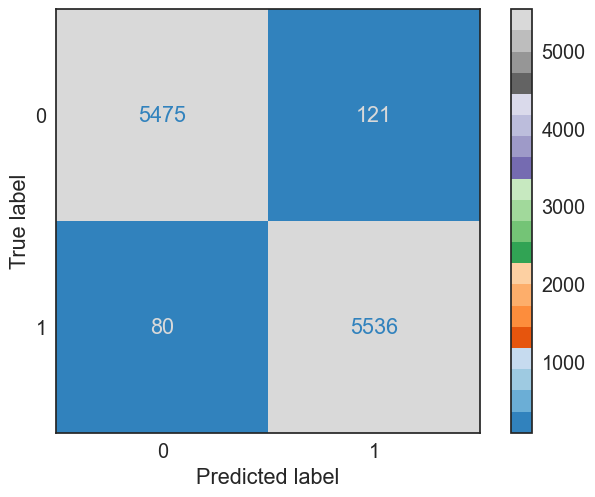

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(xg_pred,y_test)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='tab20c')#https://cloud.tencent.com/developer/article/1855005
 
plt.show()

C:\Users\zuoha\AppData\Local\Temp\ipykernel_30608\1156214383.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\zuoha\AppData\Local\Temp\ipykernel_30608\1156214383.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr9, tpr9, 'b', ms=0.1,label='Logistic', linewidth=1.5,color='green',marker='p',linestyle='--')#color='plum',
C:\Users\zuoha\AppData\Local\Temp\ipykernel_30608\1156214383.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0

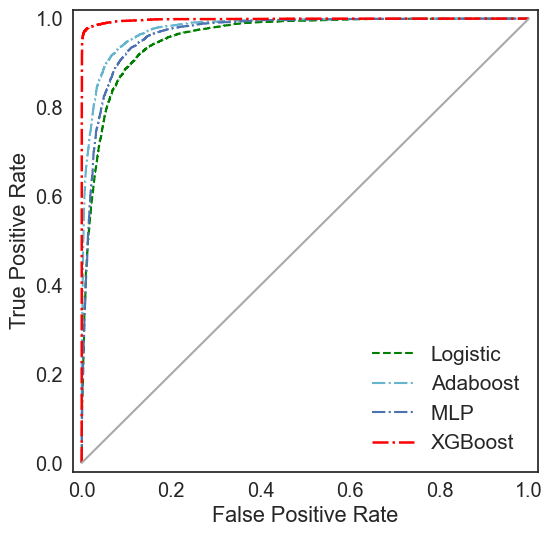

In [25]:
####roc曲线#####
fpr1, tpr1, thres1 = roc_curve(y_test, xg_proba[:, 1])
fpr2, tpr2, thres2 = roc_curve(y_test, rf_proba[:, 1])
fpr3, tpr3, thres3 = roc_curve(y_test, gbm_proba[:, 1])
fpr4, tpr4, thres4 = roc_curve(y_test, knn_proba[:, 1])
fpr5, tpr5, thres5 = roc_curve(y_test, svc_proba[:, 1])
fpr6, tpr6, thres6 = roc_curve(y_test, adb_proba[:, 1])
fpr7, tpr7, thres7 = roc_curve(y_test, gnb_proba[:, 1])
fpr8, tpr8, thres8 = roc_curve(y_test, tcf_proba[:, 1])
fpr9, tpr9, thres9 = roc_curve(y_test, log_proba[:, 1])
fpr10, tpr10, thres10 = roc_curve(y_test, gbt_proba[:, 1])
fpr11, tpr11, thres11 = roc_curve(y_test, mpl_proba[:, 1])
#fpr12, tpr12, thres12 = roc_curve(y_test, cat_proba[:, 1])


sns.set(font_scale=1.3)
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-white')
plt.plot(fpr9, tpr9, 'b', ms=0.1,label='Logistic', linewidth=1.5,color='green',marker='p',linestyle='--')#color='plum',
#plt.plot(fpr5, tpr5, 'b', label='SVM ',color='y', linewidth=1.5,linestyle='-',marker='<')#color='peru',
# plt.plot(fpr8, tpr8, 'b', label='CART', linewidth=1.5,color='red',linestyle='-.',marker='*')#color='red',
# plt.plot(fpr2, tpr2, 'b', label='RF ', linewidth=1.5,color='olive',linestyle=':')#color='olive',
#plt.plot(fpr10, tpr10, 'b', label='GradientBoost', linewidth=1.5,color='b',linestyle='--',marker='d')#color='g',
plt.plot(fpr6, tpr6, 'b', label='Adaboost', linewidth=1.5,color='c',linestyle='-.',marker='')#color='c',
#plt.plot(fpr3, tpr3, 'b', label='LightBGM ', linewidth=1.5,color='dodgerblue',linestyle=':')#color='dodgerblue',
plt.plot(fpr11, tpr11, 'b', label='MLP ', linewidth=1.5,color='b',linestyle='-.',marker='')#color='b',
plt.plot(fpr1, tpr1, 'b', ms=1,label='XGBoost', linewidth=1.8,color='red',linestyle='-.')#color='black',


#sns.set(font_scale=2)
plt.plot([0, 1], [0, 1], 'darkgrey')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.title('ROC',fontsize=15)
#plt.tick_params(label)
plt.legend(fontsize=15)
#plt.savefig('roc.svg', dpi=500, bbox_inches='tight',format='svg') #fig.savefig('tSNE_RUS.svg', dpi=200,format='svg')# 解决图片不清晰，不完整的问题
plt.show()

In [26]:
###交叉#####
import warnings
warnings.filterwarnings("ignore")
models = []
models.append(("Logistic", LogisticRegression(random_state=88)))
models.append(("SVM", SVC(random_state=88)))
models.append(("CART", tree.DecisionTreeClassifier(random_state=88)))
models.append(('RandomForest', se.RandomForestClassifier(random_state=88)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=88)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=88)))
models.append(('LightGBM', LGBMClassifier(random_state=88)))
models.append(("MLP", MLPClassifier(random_state=88)))
models.append(('XGBoost', XGBClassifier(random_state=88)))
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_balance, y_balance, cv=10, scoring="accuracy",n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



Logistic: 0.828684 (0.016384)
SVM: 0.788280 (0.016248)
CART: 0.946290 (0.027029)
RandomForest: 0.960507 (0.014612)
GradientBoost: 0.940136 (0.029643)
AdaBoost: 0.917463 (0.021848)
LightGBM: 0.969194 (0.055336)
MLP: 0.881038 (0.023447)
XGBoost: 0.971138 (0.056882)


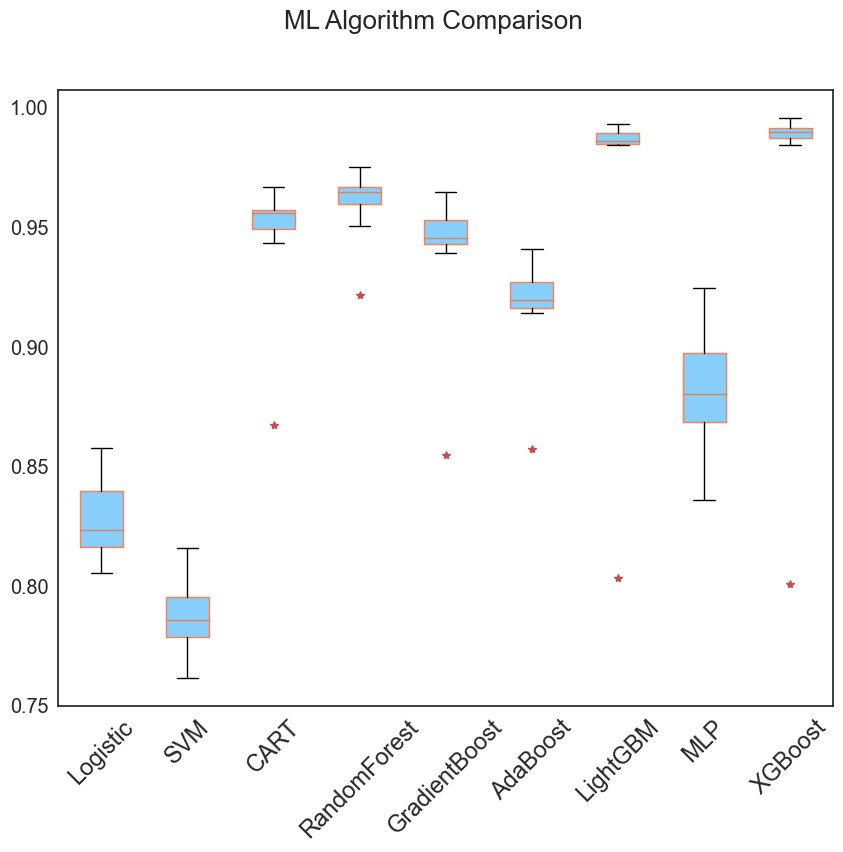

In [44]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('ML Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,sym='r*',patch_artist=True,boxprops = {'color':'coral', 'facecolor':'lightskyblue'})
ax.set_xticklabels(names,rotation=45,fontsize=17)
#plt.savefig('boxcom.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

C:\Users\zuoha\AppData\Local\Temp\ipykernel_4324\968718693.py:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


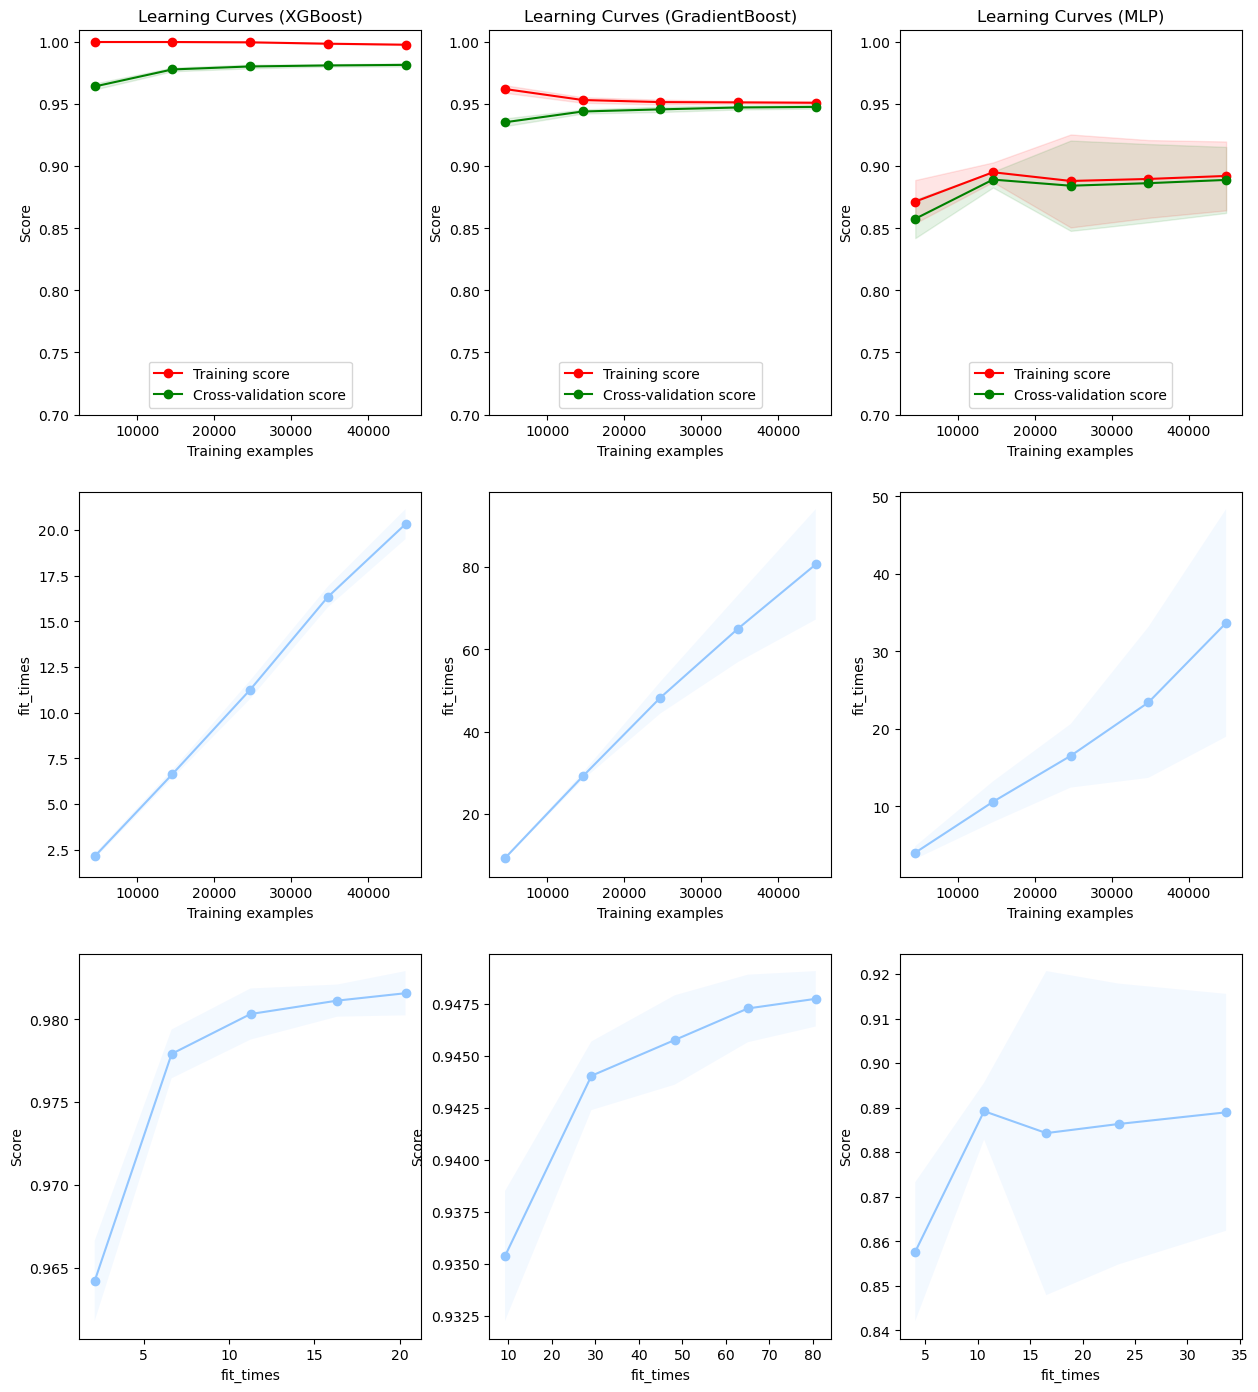

In [19]:
####学习曲线，算法耗时分析######
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(24, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    #plt.grid("on")
    #axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="lower center")
    # Plot n_samples vs fit_times
    #plt.grid("on")
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    #plt.grid("on")
    #axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #plt.grid("on")
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    #axes[2].set_title("Performance of the model")
    return plt

plt.style.use('seaborn-pastel')
#sns.set(font_scale=1)
fig, axes = plt.subplots(3, 3, figsize=(15, 17))
#plt.style.use('seaborn')
#plt.grid("on")
#X, y = load_digits(return_X_y=True)

title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = XGBClassifier()
plot_learning_curve(estimator, title, x_balance, y_balance, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (GradientBoost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, x_balance, y_balance, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, x_balance, y_balance, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

#plt.savefig('learn.svg', dpi=500, bbox_inches='tight',format='svg') # 解决图片不清晰，不完整的问题
plt.show()

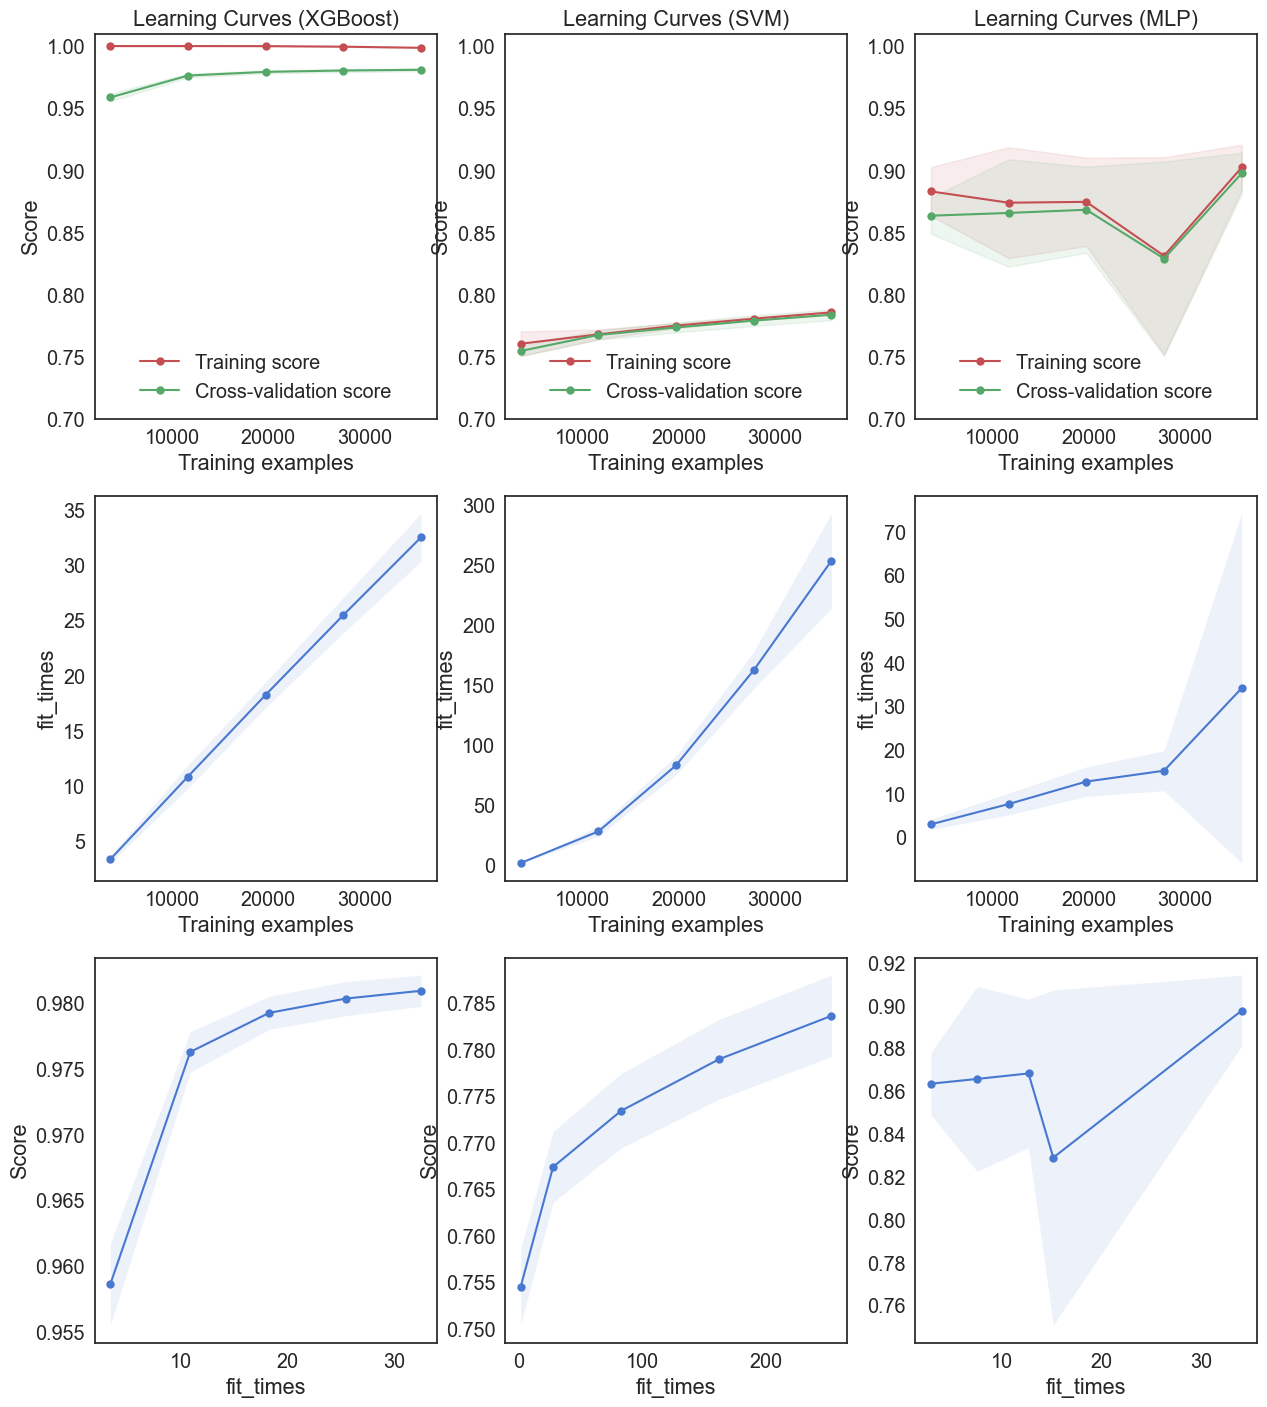

In [97]:
###在训练集
####学习曲线，算法耗时分析######
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    #plt.grid("on")
    #axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="lower center")
    # Plot n_samples vs fit_times
    #plt.grid("on")
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    #plt.grid("on")
    #axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #plt.grid("on")
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    #axes[2].set_title("Performance of the model")
    return plt

plt.style.use('seaborn-muted')
#sns.set(font_scale=1)
fig, axes = plt.subplots(3, 3, figsize=(15, 17))
#plt.style.use('seaborn')
#plt.grid("on")
#X, y = load_digits(return_X_y=True)

title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC()
plot_learning_curve(estimator, title,X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

#plt.savefig('learn.svg', dpi=500, bbox_inches='tight',format='svg') # 解决图片不清晰，不完整的问题
plt.show()

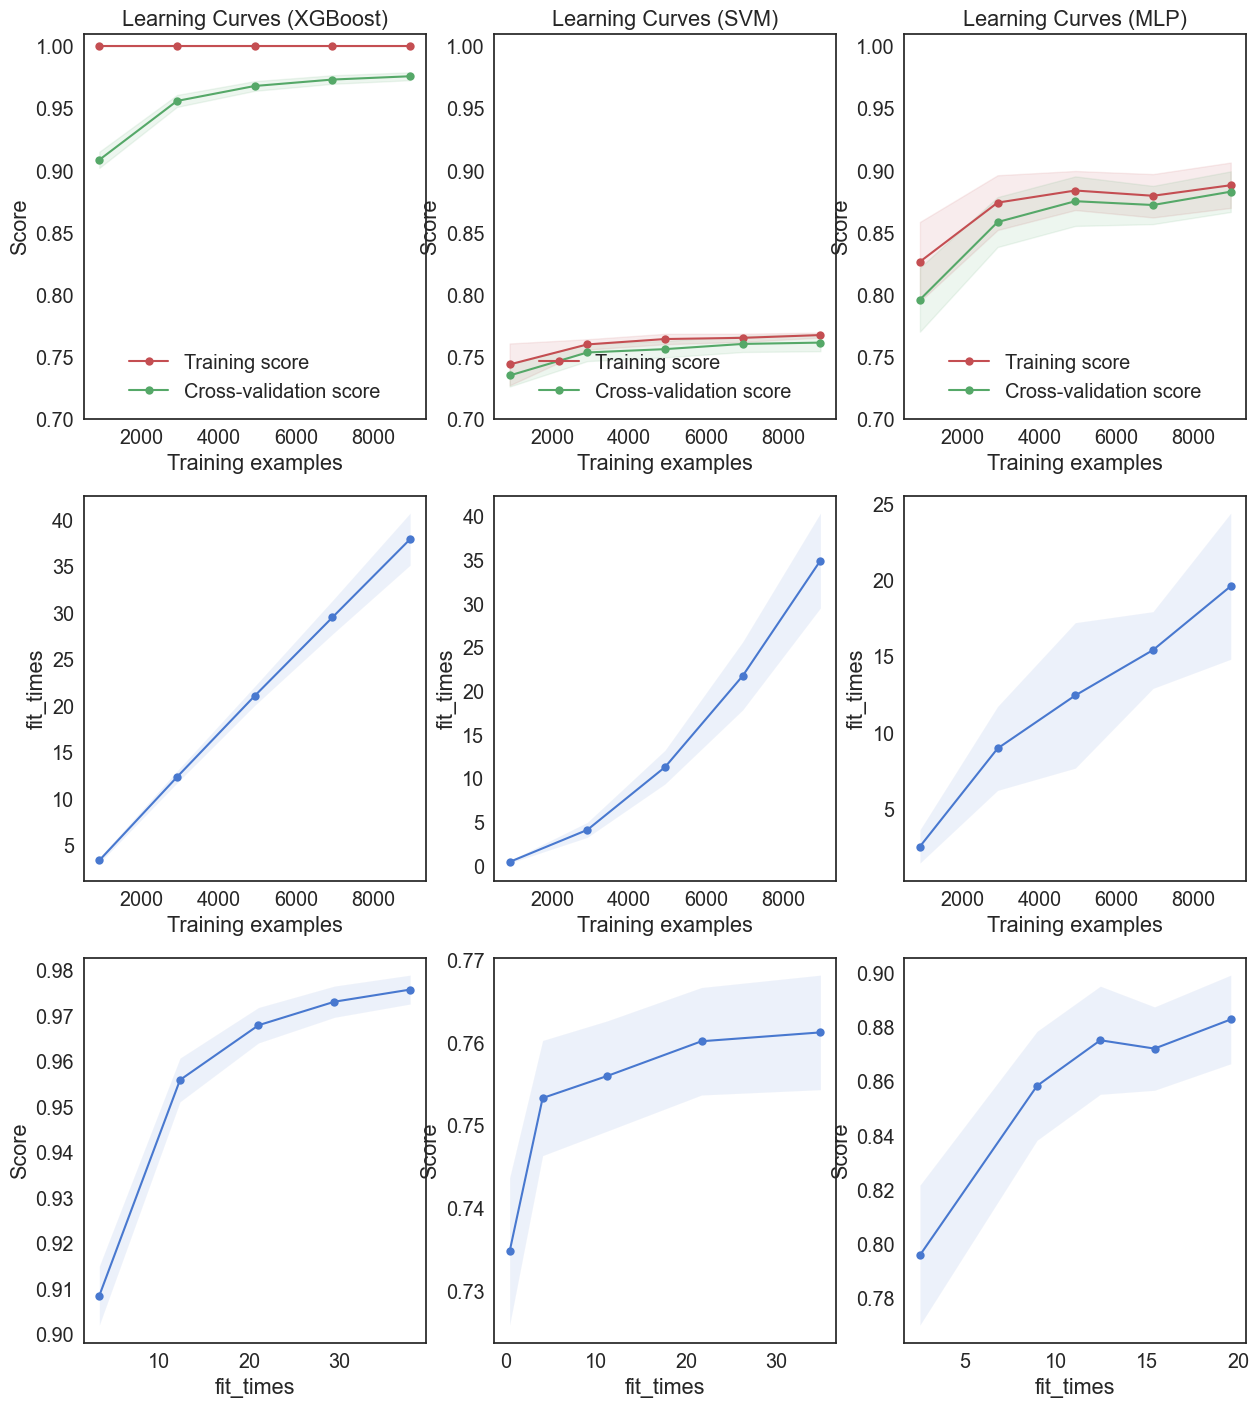

In [98]:
###在测试集
####学习曲线，算法耗时分析######
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    #plt.grid("on")
    #axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="lower center")
    # Plot n_samples vs fit_times
    #plt.grid("on")
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    #plt.grid("on")
    #axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #plt.grid("on")
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    #axes[2].set_title("Performance of the model")
    return plt

plt.style.use('seaborn-muted')
#sns.set(font_scale=1)
fig, axes = plt.subplots(3, 3, figsize=(15, 17))
#plt.style.use('seaborn')
#plt.grid("on")
#X, y = load_digits(return_X_y=True)

title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_test, y_test, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (GradientBoost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X_test, y_test, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title,  X_test, y_test, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

#plt.savefig('learn.svg', dpi=500, bbox_inches='tight',format='svg') # 解决图片不清晰，不完整的问题
plt.show()

In [53]:
###调参
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
cv_params = {  'reg_alpha':[0.1,0.2,0.3,0.4,0.5,0.6]}
# cv_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1],
#               "n_estimators": [700,800,900,950,1000],
#               "max_depth":[5,6,7,8,9,10],
#             'min_child_weight':[1,2,3,4],
#              'colsample_bytree':[0.1,0.2,0.3,0.4,0.5],
#              'reg_alpha':[0.1,0.2,0.3,0.4,0.5,0.6],
#               'subsample':[0.2,0.3,0.4,0.5,0.6,0.7]}
other_params={'learning_rate': 0.05, 'n_estimators': 700, 'max_depth':10, 
              'min_child_weight': 1, 'seed': 0,
                'subsample': 0.6, 'colsample_bytree': 0.2, 'gamma': 0.1, 
              'reg_lambda': 0.05}
search_xgboost = XGBClassifier(**other_params)
optimized_xg = GridSearchCV(estimator=search_xgboost, 
param_grid=cv_params, scoring='accuracy', cv=1, verbose=1, n_jobs=-1)
optimized_xg.fit(X_train, y_train)
#evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_xg.best_params_))
print('最佳模型得分:{0}'.format(optimized_xg.best_score_))

Fitting 3 folds for each of 86400 candidates, totalling 259200 fits


KeyboardInterrupt: 

In [ ]:
{'learning_rate': 0.05, 'n_estimators': 700, 'max_depth':10, 
              'min_child_weight': 1, 'seed': 0,
                'subsample': 0.6, 'colsample_bytree': 0.3, 'gamma': 0.1, 
              'reg_alpha': 0.3, 'reg_lambda': 0.05}#0.9853

In [93]:
other_params={'learning_rate': 0.05, 'n_estimators': 960, 'max_depth':10, 
              'min_child_weight': 1, 'seed': 0,
                'subsample': 0.7, 'colsample_bytree': 0.5, 'gamma': 0.1, 
              'reg_alpha': 0.4, 'reg_lambda': 0.09}
pxg_model = XGBClassifier(**other_params)
pxg_model.fit(X_train, y_train)
pxg_pred = pxg_model.predict(X_test)
pxg_proba=pxg_model.predict_proba(X_test)
####评价指标
print(classification_report(y_test, pxg_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9820    0.9908    0.9864      5555
           1     0.9909    0.9821    0.9865      5657

    accuracy                         0.9864     11212
   macro avg     0.9864    0.9865    0.9864     11212
weighted avg     0.9865    0.9864    0.9864     11212



In [94]:
confusion_matrix(xg_pred,y_test)

array([[5475,  121],
       [  80, 5536]], dtype=int64)

In [95]:
spc = 5536/(5536+121)
spc

0.9786105709740145

In [ ]:
#######SHAP

In [25]:
import shap
#shap.initjs()

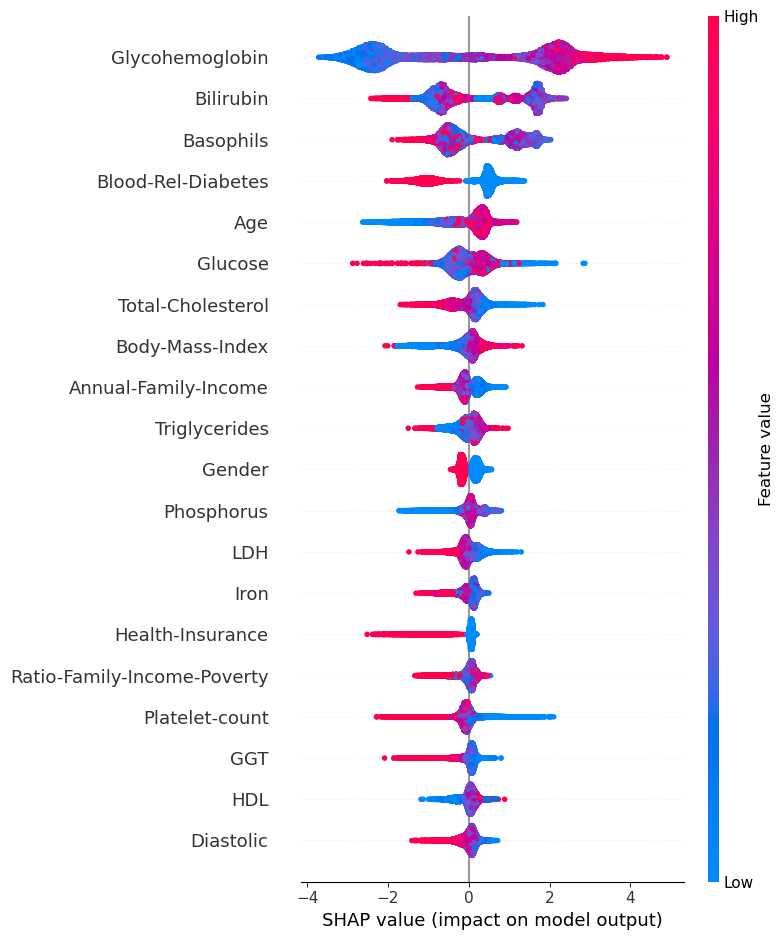

<Figure size 640x480 with 0 Axes>

In [64]:
#explainer = shap.TreeExplainer(xg_model)
shap_values = shap.TreeExplainer(xg_model).shap_values(X_train)  # 传入特征矩阵X，计算SHAP值
#shap.plots.waterfall(shap_values[0])

plt.style.use('seaborn-muted')
#sns.set_style('white')
#sns.set(font_scale=2)
shap.summary_plot(shap_values, X_train)

plt.savefig('shap1.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

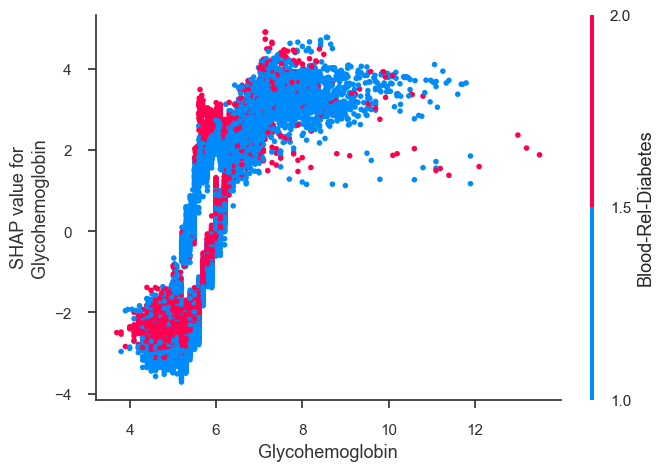

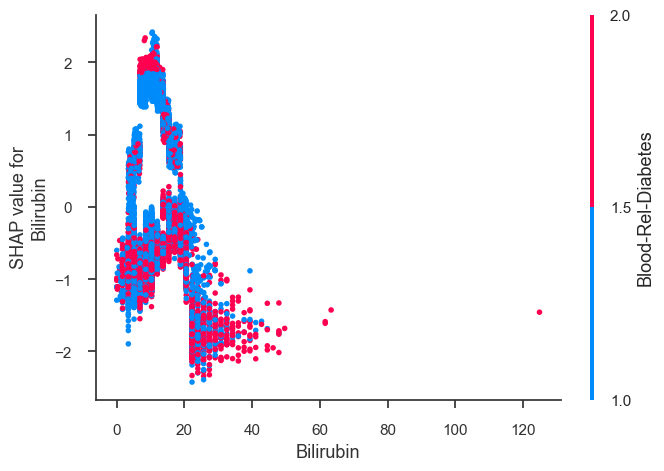

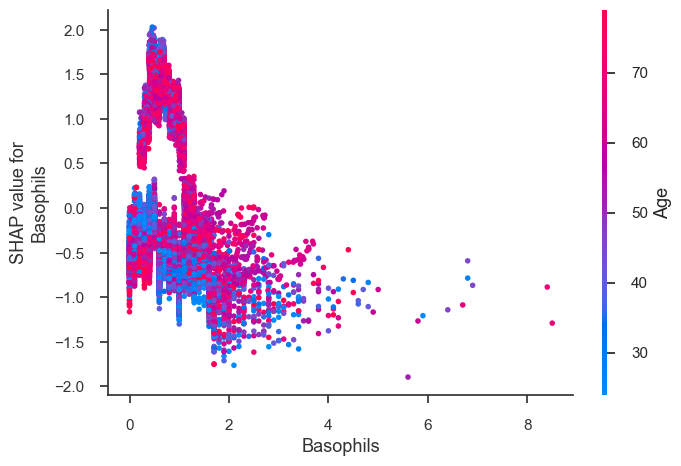

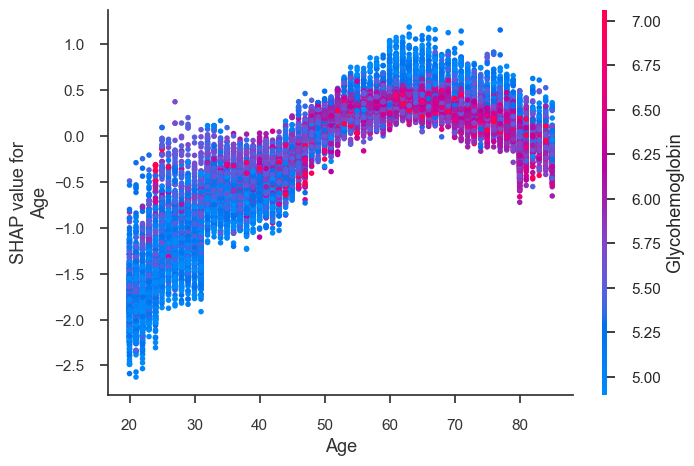

In [89]:
plt.style.use('seaborn-muted')
shap.dependence_plot("Glycohemoglobin", shap_values, X_train)
shap.dependence_plot("Bilirubin", shap_values, X_train)
shap.dependence_plot("Basophils", shap_values, X_train)
#shap.dependence_plot("Blood-Rel-Diabetes", shap_values,X_train)
shap.dependence_plot("Age", shap_values, X_train)



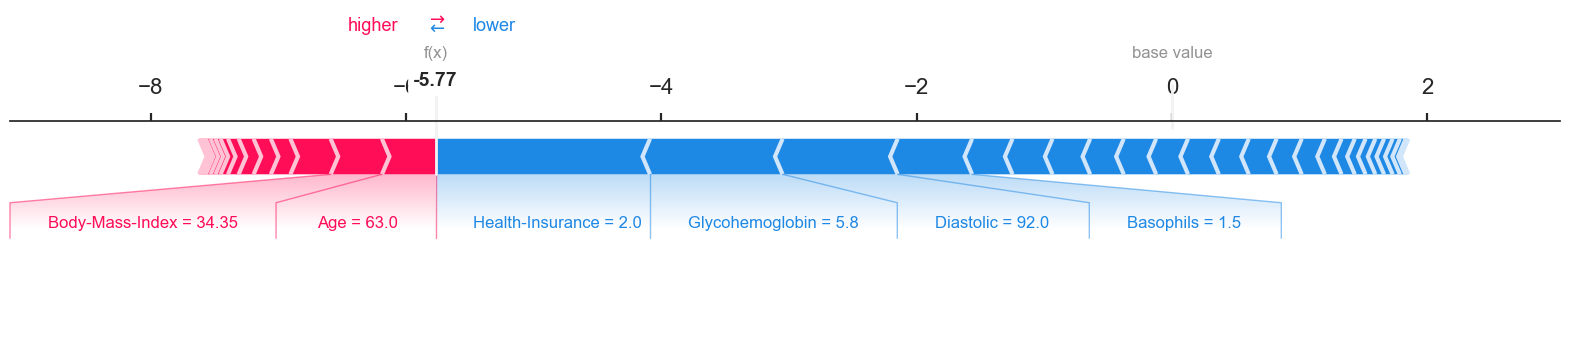

In [80]:
plt.style.use('seaborn-ticks')
#sns.set(font_scale=1.5)
explainer = shap.TreeExplainer(xg_model)
#plt.style.use('seaborn-muted')
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:],matplotlib=True)
#plt.savefig('shap_force.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题

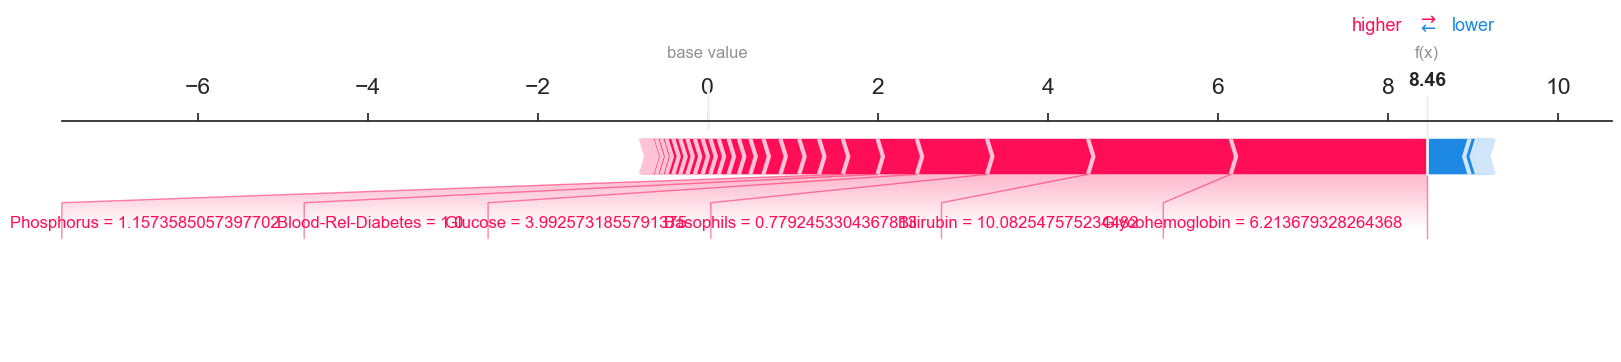

In [85]:
plt.style.use('seaborn-ticks')

explainer = shap.TreeExplainer(xg_model)
#plt.style.use('seaborn-muted')
shap.force_plot(explainer.expected_value, shap_values[15,:], X_train.iloc[15,:],matplotlib=True)
#plt.savefig('shap_force.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题

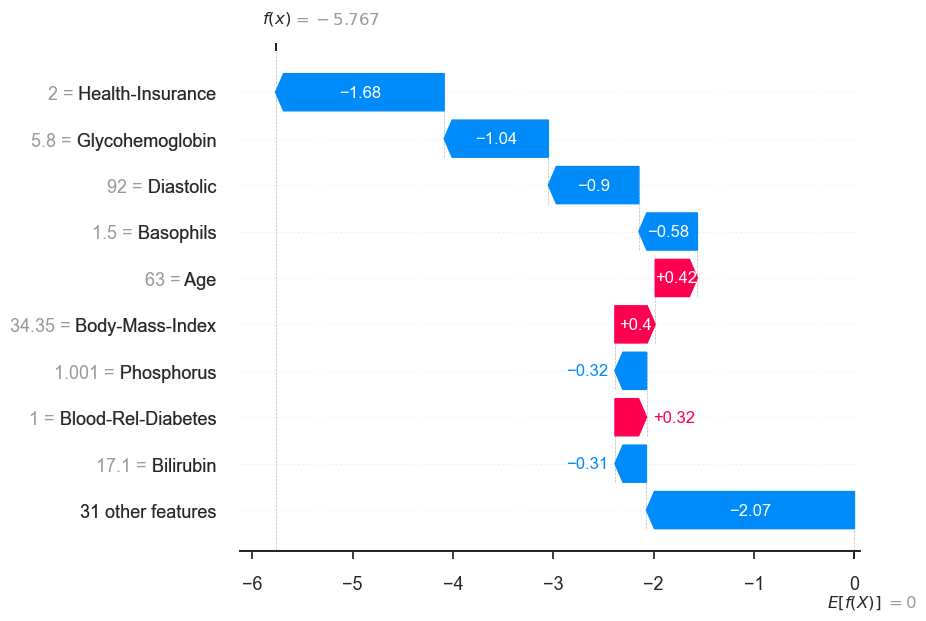

In [82]:

plt.style.use('seaborn-ticks')
shap.waterfall_plot(shap.Explanation(values=shap_values[0,:], 
                                            base_values=explainer.expected_value, data=X_train.iloc[0,:],  
                                            feature_names=X_train.columns.tolist()))

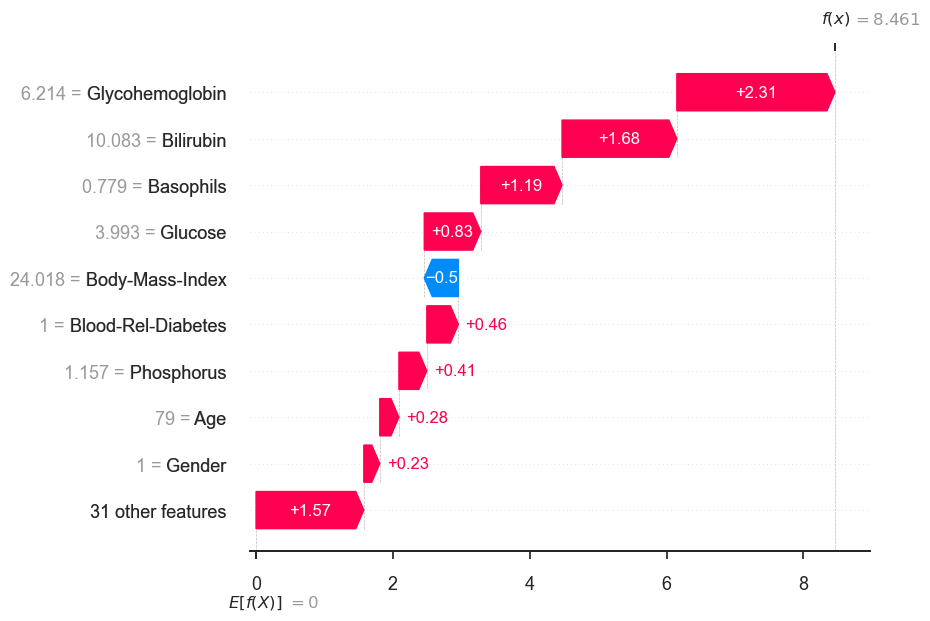

In [83]:

plt.style.use('seaborn-ticks')
shap.waterfall_plot(shap.Explanation(values=shap_values[15,:], 
                                            base_values=explainer.expected_value, data=X_train.iloc[15,:],  
                                            feature_names=X_train.columns.tolist()))

In [106]:
#sns.set(font_scale=0.5)
plt.style.use('seaborn-muted')
headers = ["name", "score"]
values = sorted(zip(df.columns, xg_model.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns=headers)

headers1 = ["name", "score"]
values1 = sorted(zip(df.columns, xg_model.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values1, columns=headers1)
xgb_features = xgb_feature_importances['name'][:10]
y_pos_xgb = np.arange(len(xgb_features))
scores_xgb = xgb_feature_importances['score'][:10]
FI_xgboost = pd.DataFrame(list(zip(xgb_features, scores_xgb)))
FI_xgboost.columns = ['features','scores']

headers2 = ["name", "score"]
values2 = sorted(zip(df.columns, gbm_model.feature_importances_), key=lambda x: x[1] * -1)
gbm_feature_importances = pd.DataFrame(values2, columns=headers2)
gbm_features = gbm_feature_importances['name'][:10]
y_pos_gbm = np.arange(len(gbm_features))
scores_gbm = gbm_feature_importances['score'][:10]
FI_gbm = pd.DataFrame(list(zip(gbm_features, scores_gbm)))
FI_gbm.columns = ['features','scores']

rf_features = rf_feature_importances['name'][:10]
y_pos_rf = np.arange(len(rf_features))
scores_rf= rf_feature_importances['score'][:10]
FI_rf = pd.DataFrame(list(zip(rf_features, scores_rf)))
FI_rf.columns = ['features','scores']

global_shap_values = pd.DataFrame(np.abs(shap_values).mean(0),index=X_train.columns).reset_index()
global_shap_values.columns = ['feature','scores']
global_shap_values = global_shap_values.sort_values('scores',ascending=False)
shap_FI=global_shap_values['feature'][:10]
y_pos_shap=np.arange(len(shap_FI))
scores_shap = global_shap_values['scores'][:10]
FI_shap = pd.DataFrame(list(zip(shap_FI, scores_shap)))
FI_shap.columns = ['features','scores']

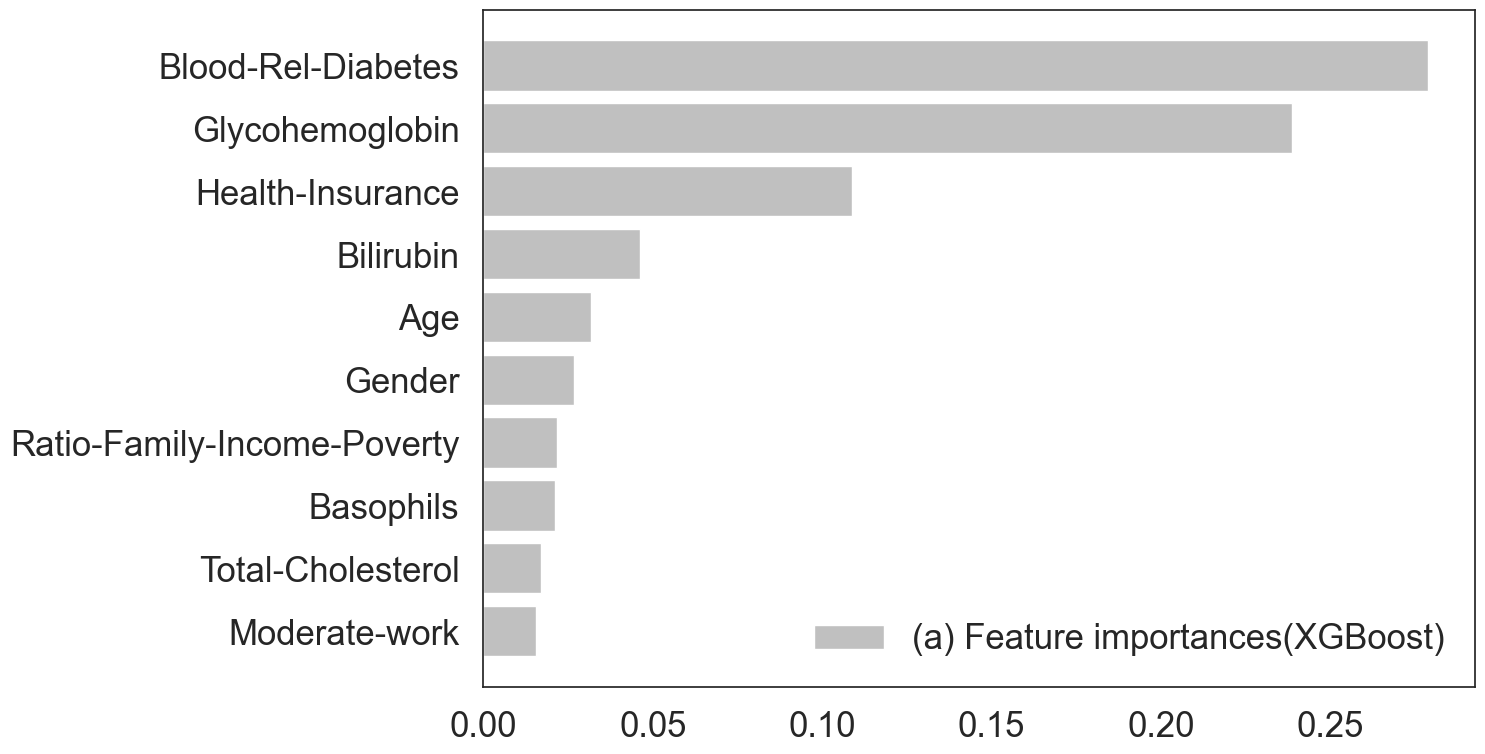

In [131]:
plt.barh(y=FI_xgboost.loc[:,'features'],
         width=FI_xgboost.sort_values('scores',ascending=True).loc[:,'scores'],color='silver',alpha=1)
plt.yticks(y_pos_xgb,FI_xgboost.sort_values('scores',ascending=True).loc[:,'features'],fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['(a) Feature importances(XGBoost)'],loc='lower right',fontsize=25)
plt.savefig('importance1.svg', dpi=500, bbox_inches='tight',format='svg')

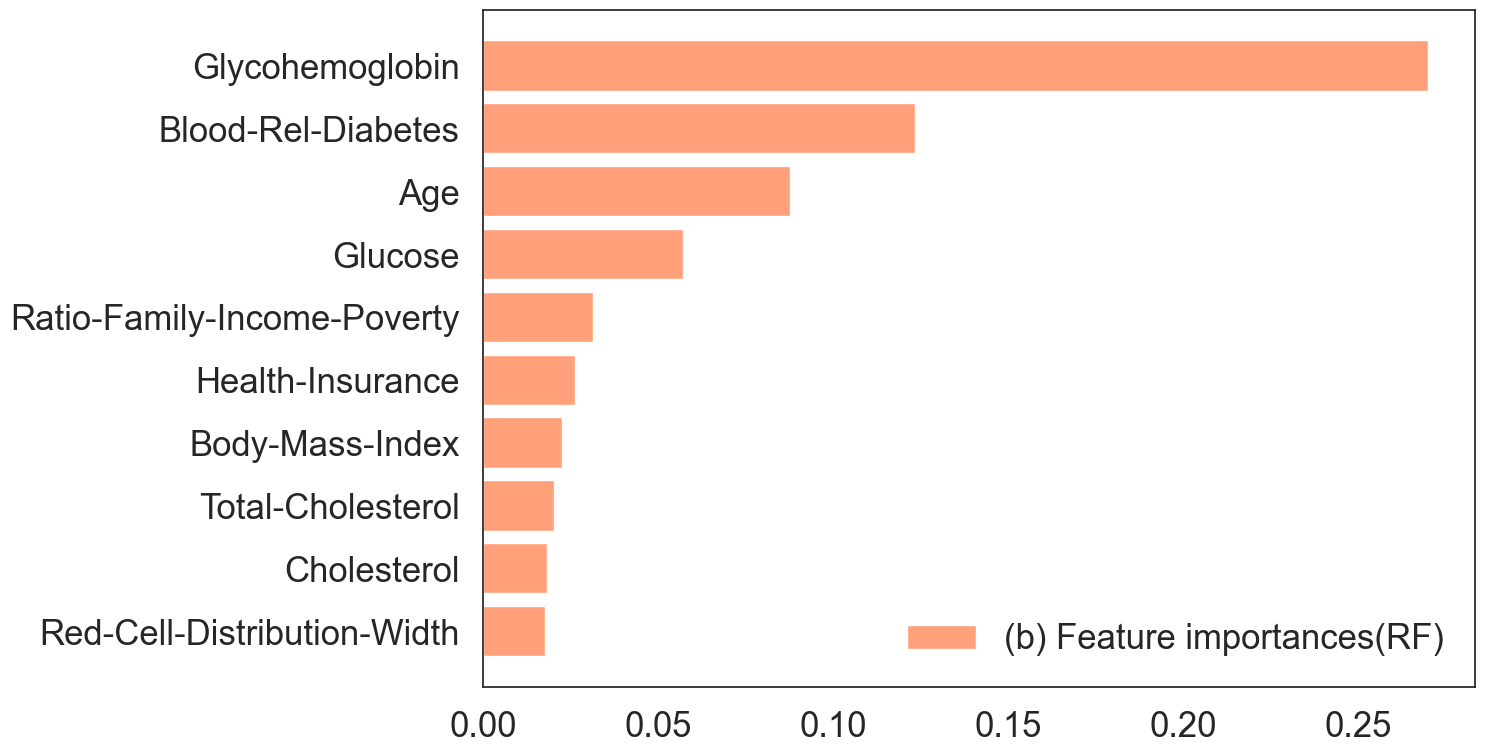

In [132]:
plt.barh(y=FI_rf.loc[:,'features'],
         width=FI_rf.sort_values('scores',ascending=True).loc[:,'scores'],color='lightsalmon',alpha=1)
plt.yticks(y_pos_rf,FI_rf.sort_values('scores',ascending=True).loc[:,'features'],fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['(b) Feature importances(RF)'],loc='lower right',fontsize=25)
plt.savefig('importance2.svg', dpi=500, bbox_inches='tight',format='svg')

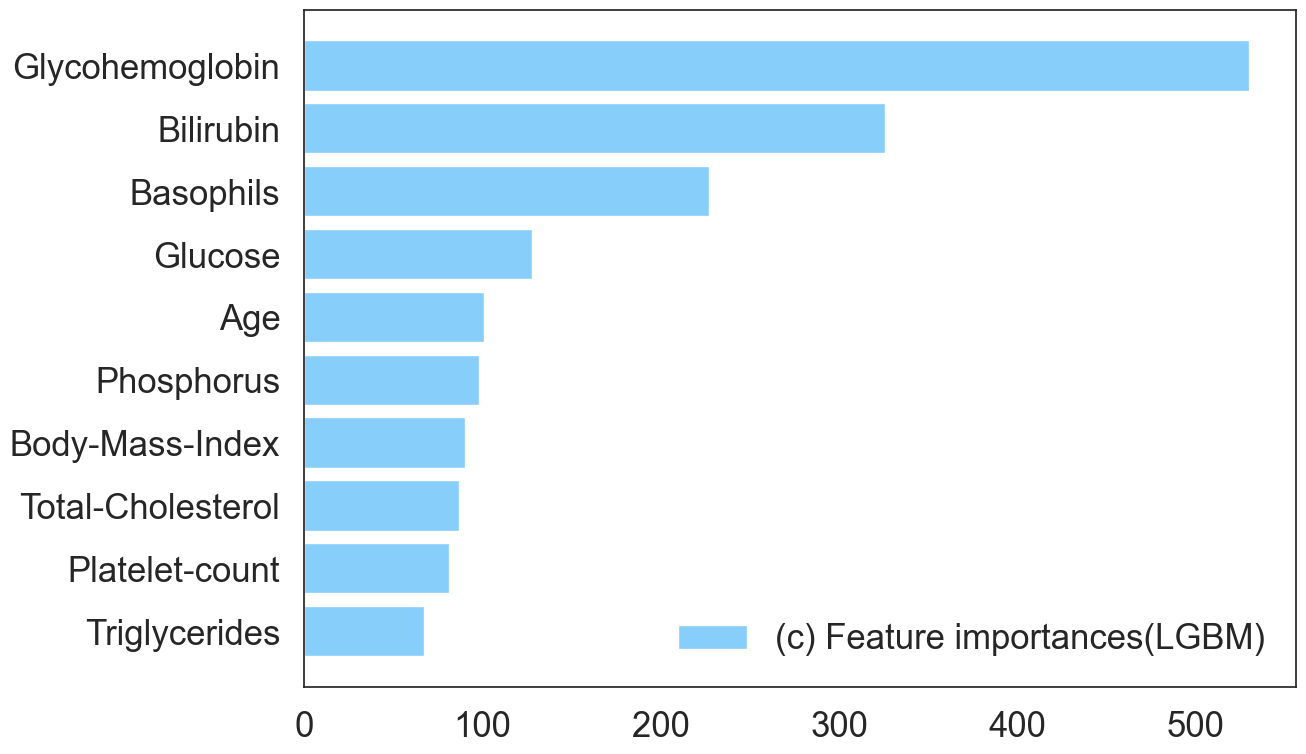

In [133]:
plt.barh(y=FI_gbm.loc[:,'features'],
         width=FI_gbm.sort_values('scores',ascending=True).loc[:,'scores'],color='lightskyblue',alpha=1)
plt.yticks(y_pos_gbm,FI_gbm.sort_values('scores',ascending=True).loc[:,'features'],fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['(c) Feature importances(LGBM)'],loc='lower right',fontsize=25)
plt.savefig('importance3.svg', dpi=500, bbox_inches='tight',format='svg')

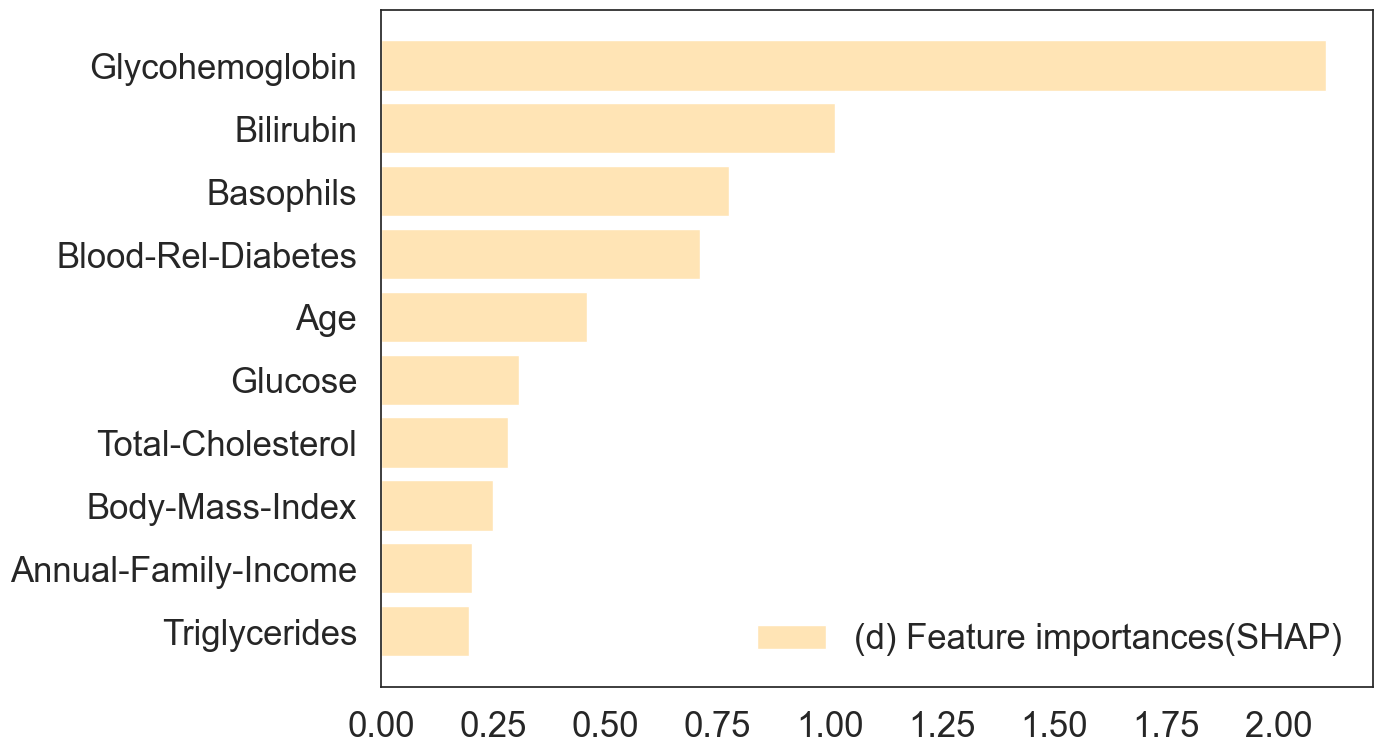

In [134]:
plt.barh(y=FI_shap.loc[:,'features'],
         width=FI_shap.sort_values('scores',ascending=True).loc[:,'scores'],color='moccasin',alpha=1)
plt.yticks(y_pos_shap,FI_shap.sort_values('scores',ascending=True).loc[:,'features'],fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['(d) Feature importances(SHAP)'],loc='lower right',fontsize=25)
plt.savefig('importance4.svg', dpi=500, bbox_inches='tight',format='svg')

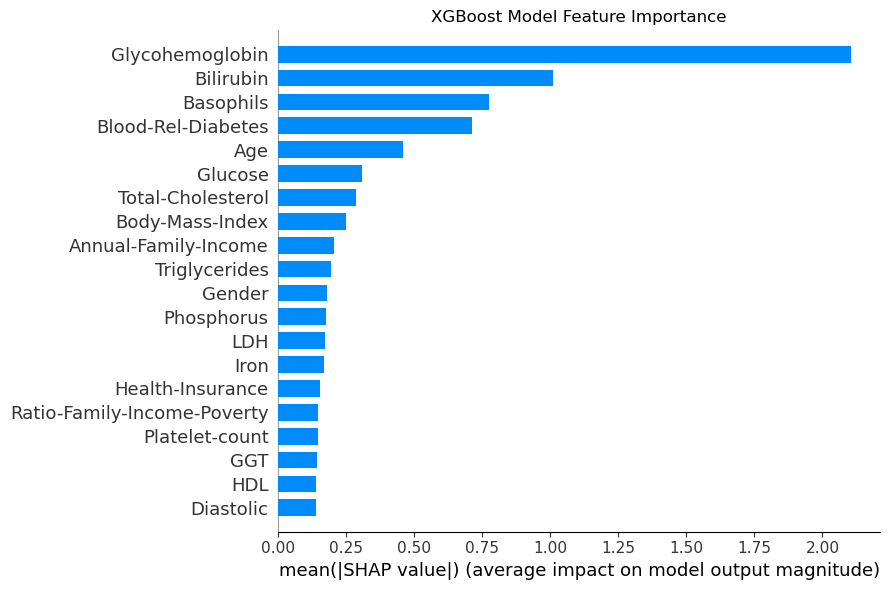

In [26]:
class_names = ["Non-Diabetic", "Diabetic"]

# compute SHAP values
explainer = shap.TreeExplainer(xg_model)
shap_values_xgb = explainer.shap_values(X_train)

# compute SHAP values on Test for Force plots 
shap_values_test_xgb = explainer.shap_values(X_test)

plt.figure(figsize=(8,6))
plt.title("XGBoost Model Feature Importance")
shap.summary_plot(shap_values_xgb, 
                  X_train.values, 
                  plot_type="bar", 
                  class_names=class_names,
                  feature_names = X_train.columns,
                  plot_size = (9,6))